# U.S. International Air Traffic data(1990-2020)
The data comes from the U.S. International Air Passenger and Freight Statistics Report. USDOT(US Department Of Transportation) receives traffic reports of US and international airlines operating to and from US airports. 

The data contains data on all flights between US gateways and non-US gateways, irrespective of origin and destination.
Each observation provides information on a specific airline for a pair of airports, one in the US and the other outside. Three main columns record the number of flights: Scheduled, Charter, and Total.

- usg_apt_id: US Gateway Airport ID - assigned by US DOT to identify an airport
- usg_apt: US Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code
- usg_wac: US Gateway World Area Code - assigned by US DOT to represent a geographic territory
- fg_apt_id: Foreign Gateway Airport ID - assigned by US DOT to identify an airport
- fg_apt: Foreign Gateway Airport Code - usually assigned by IATA, but in absense of IATA designation, may show FAA-assigned code
- fg_wac: Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory
- airlineid: Airline ID - assigned by US DOT to identify an air carrier
- carrier: IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used
- carriergroup: Carrier Group Code - 1 denotes US domsns.swarmplot(x=df['sepal_width'])estic air carriers, 0 denotes foreign air carriers
- type: The type of the metrics
- Scheduled: Metric flown by scheduled service operations
- Charter: Metric flown by charter operations
- Total: Total Total Metric flown by scheduled service and charter operations

## Importing Libraries and Reading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
perm_df = pd.read_csv('International_Report_Departures.csv')

df = pd.read_csv('International_Report_Departures.csv')
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


## Information about the dataset

In [3]:
df.dtypes, df.shape

# There are 5 variables with non numerical values.

(data_dte        object
 Year             int64
 Month            int64
 usg_apt_id       int64
 usg_apt         object
 usg_wac          int64
 fg_apt_id        int64
 fg_apt          object
 fg_wac           int64
 airlineid        int64
 carrier         object
 carriergroup     int64
 type            object
 Scheduled        int64
 Charter          int64
 Total            int64
 dtype: object,
 (930808, 16))

### Handling missing values

In [4]:
df.isnull().sum()

# Carrier has 3055 missing values.

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [5]:
df['carrier'].value_counts()

# Since carrier is a categorical variable, we will replace the nan with 'AA'(Most frequent value)

AA     58739
DL     48520
UA     42469
CO     25754
FX     21621
       ...  
WOA        1
SKB        1
PNA        1
H6         1
KO         1
Name: carrier, Length: 734, dtype: int64

In [6]:
df['carrier'] = df['carrier'].fillna('AA')

In [7]:
df.isnull().sum().sum()

0

## Understanding features 

**usg_apt_id** feature: unique identifier for airports. Airport Inside US.

In [8]:
df['usg_apt_id'].value_counts()

13303    133820
12478     78824
12892     57492
13930     43853
11618     36708
          ...  
16702         1
15165         1
13429         1
13632         1
12396         1
Name: usg_apt_id, Length: 1015, dtype: int64

**usg_apt** feature: 3 letter code for identifying an airport. Usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code, thats why a 'usg_apt_id' may have two different 'usg_apt'.  

In [9]:
df['usg_apt'].value_counts()

MIA    133820
JFK     78824
LAX     57492
ORD     43853
EWR     36708
        ...  
BGT         1
GA7         1
TEX         1
TAL         1
KPB         1
Name: usg_apt, Length: 1022, dtype: int64

**usg_wac**: US Gateway World Area Code - assigned by US DOT to represent a geographic territory

In [10]:
df['usg_wac'].value_counts()[:10], len(df['usg_wac'].value_counts()), df['usg_wac'].describe()

(33    192897
 22    105979
 91     95137
 74     77082
 41     47371
 34     30252
 21     28868
 1      28502
 3      27028
 13     22505
 Name: usg_wac, dtype: int64,
 54,
 count    930808.000000
 mean         42.511740
 std          27.571338
 min           1.000000
 25%          22.000000
 50%          33.000000
 75%          72.000000
 max          93.000000
 Name: usg_wac, dtype: float64)

**fg_apt_id**: Foreign Gateway Airport ID - assigned by US DOT to identify an airport. Airport Outside US.

In [11]:
df['fg_apt_id'].value_counts()

16271    50044
11032    32168
13252    26781
13744    21275
16229    20941
         ...  
16638        1
14069        1
13545        1
12521        1
14343        1
Name: fg_apt_id, Length: 1666, dtype: int64

**fg_apt**: Foreign Gateway Airport Code - usually assigned by IATA, but in absense of IATA designation, may show FAA-assigned code

In [12]:
df['fg_apt'].value_counts()

# Toronto Pearson International Airport has the YYZ code.

YYZ    50044
CUN    32168
MEX    26781
NRT    21275
YVR    20941
       ...  
ZUH        1
UK1        1
DEB        1
GPS        1
KUO        1
Name: fg_apt, Length: 1669, dtype: int64

**fg_wac**: Foreign Gateway World Area Code. Assigned by US DOT to represent a geographic territory

In [13]:
df['fg_wac'].value_counts()

148    151405
936     68885
493     49936
736     42248
429     33850
        ...  
256         1
812         1
405         1
503         1
511         1
Name: fg_wac, Length: 229, dtype: int64

**airlineid**: Airline ID, to identify an air carrier company

In [14]:
df['airlineid'].value_counts()

19805    58739
19790    48520
19977    42469
19704    25754
20107    24381
         ...  
20337        1
19955        1
20341        1
19916        1
20319        1
Name: airlineid, Length: 705, dtype: int64

**carrier**: IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used

In [15]:
df['carrier'].value_counts()

# AA means American Airlines.

AA     61794
DL     48520
UA     42469
CO     25754
FX     21621
       ...  
WOA        1
SKB        1
PNA        1
H6         1
KO         1
Name: carrier, Length: 734, dtype: int64

**carriergroup**: Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers

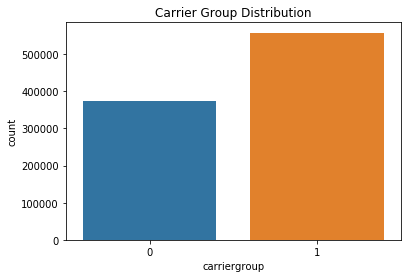

1    557890
0    372918
Name: carriergroup, dtype: int64


In [16]:
fig = sns.countplot(x = df['carriergroup'])
fig.set(title='Carrier Group Distribution')
plt.show()
print(df['carriergroup'].value_counts())
# Most of the rows contains information about domestic air carriers.

**type**: The type of the metrics

In [17]:
df['type'].value_counts()

# It only have 1 value. Redundant feature

Departures    930808
Name: type, dtype: int64

**Scheduled**: Airplanes flown by scheduled service operations. Scheduled flights are those which get their schedule approved by the aviation regulator in advance for a period running into months.

In [18]:
df['Scheduled'].value_counts(), df['Scheduled'].describe()

# 40 scheduled flights on average departure from an US airport.

(0      263209
 1       65678
 62      56840
 60      42528
 8       23867
         ...  
 887         1
 753         1
 888         1
 892         1
 811         1
 Name: Scheduled, Length: 883, dtype: int64,
 count    930808.000000
 mean         40.003181
 std          60.948973
 min           0.000000
 25%           0.000000
 50%          17.000000
 75%          60.000000
 max        2019.000000
 Name: Scheduled, dtype: float64)

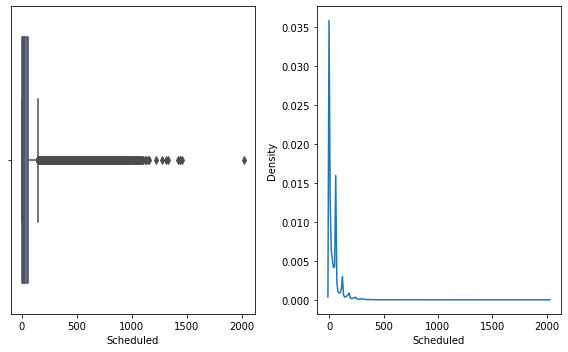

3.6135565853124016


In [19]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
fig = sns.boxplot(x = df['Scheduled'], palette='deep')
plt.subplot(1, 2, 2)
fig = sns.kdeplot(x=df['Scheduled'])
plt.tight_layout()
plt.show()

print(df['Scheduled'].skew())

# data is Right skewed

**Charter**: Airplanes flown by charter operations. A charter flight is a flight that is not part of an airline's published schedule (private planes).

In [20]:
print(df['Charter'].value_counts(), df['Charter'].describe())

0      656727
1      111427
2       42074
4       16478
3       14472
        ...  
165         1
237         1
241         1
242         1
176         1
Name: Charter, Length: 255, dtype: int64 count    930808.000000
mean          2.005483
std           8.278403
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1092.000000
Name: Charter, dtype: float64


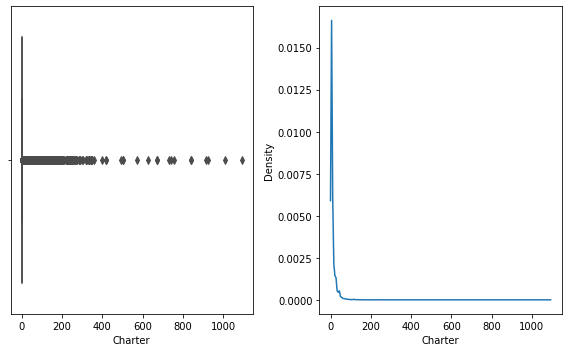

23.437390399798197


In [21]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
fig = sns.boxplot(x = df['Charter'], palette='deep')
plt.subplot(1, 2, 2)
fig = sns.kdeplot(x=df['Charter'])
plt.tight_layout()
plt.show()

print(df['Charter'].skew())

# Most the values lies near 0 and there is a right skewness to it.

**Total**: Total airplane flown by scheduled service and charter operations

In [22]:
print(df['Total'].value_counts(), df['Total'].describe())

1       172867
62       56804
2        56342
60       42520
8        36465
         ...  
1096         1
830          1
833          1
836          1
725          1
Name: Total, Length: 886, dtype: int64 count    930808.000000
mean         42.008665
std          60.340835
min           1.000000
25%           3.000000
50%          20.000000
75%          60.000000
max        2019.000000
Name: Total, dtype: float64


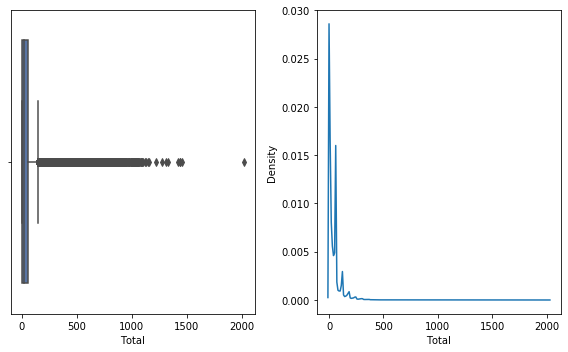

3.714123057669517


In [23]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
fig = sns.boxplot(x = df['Total'], palette='deep')
plt.subplot(1, 2, 2)
fig = sns.kdeplot(x=df['Total'])
plt.tight_layout()
plt.show()

print(df['Total'].skew())

# Total is right skewed

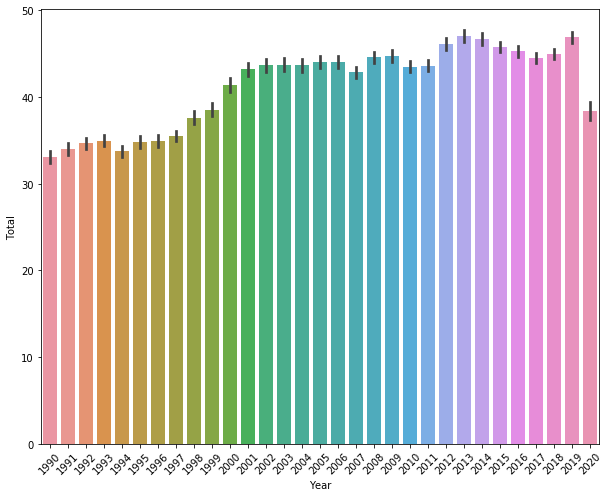

In [24]:
plt.figure(figsize=(10,8))
fig = sns.barplot(x=df['Year'], y=df['Total'])
fig.tick_params(axis='x', rotation=45)

# There is an exponential increase of flights from 1990-2001 and after that the curve gets almost flattened. 
# 2020(data is only from Jan to march) has a significantly less number of flights maybe due to the covid-19.

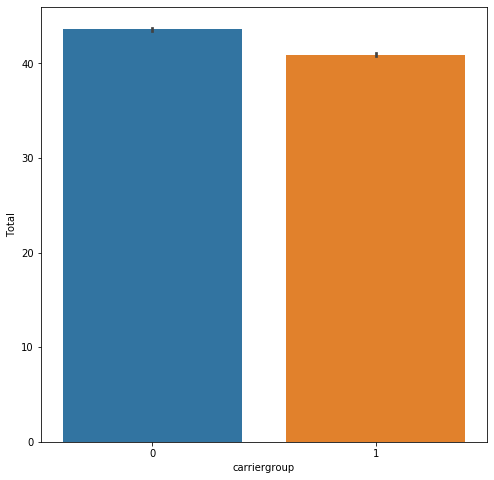

In [25]:
plt.figure(figsize=(8,8))
fig = sns.barplot(x=df['carriergroup'], y=df['Total'])
# 1 denotes US domestic air carriers, 0 denotes foreign air carriers

# Foreign carrier have larger number of flight than the domestic flights.

## Mostly concentrate on the relation between Airport, airport area and total airplane departed from different airport.
Removing feature which does not relate to the total and airport code including:
- type
- usg_apt_id
- data_dte
- fg_apt_id
- airlineid

In [26]:
# df = perm_df.drop(['type', 'usg_apt_id', 'data_dte', 'fg_apt_id', 'airlineid', 'Scheduled', 'Charter'], axis=1)
df = perm_df.drop(['type', 'usg_apt_id', 'data_dte', 'fg_apt_id', 'airlineid'], axis=1)
df.head()

,Year,Month,usg_apt,usg_wac,fg_apt,fg_wac,carrier,carriergroup,Scheduled,Charter,Total
0,2006,5,GUM,5,MAJ,844,PFQ,1,0,10,10
1,2003,5,ANC,1,OKO,736,5Y,1,0,15,15
2,2007,3,BOS,13,KEF,439,GL,1,0,1,1
3,2004,12,DAL,74,YYZ,936,AMQ,1,0,1,1
4,2009,5,MIA,33,CMW,219,5L,0,0,20,20


In [27]:
df = df.sort_values(['Year', 'Month'], ascending=True).reset_index(drop = True)
df.head()

,Year,Month,usg_apt,usg_wac,fg_apt,fg_wac,carrier,carriergroup,Scheduled,Charter,Total
0,1990,1,JFK,22,CUN,148,KEQ,1,0,6,6
1,1990,1,BWI,35,CUN,148,ACQ,0,0,11,11
2,1990,1,LAS,85,YQR,921,CP,0,0,12,12
3,1990,1,EWR,21,CGN,429,5X,1,0,37,37
4,1990,1,ORD,41,CUN,148,INQ,1,0,16,16


In [28]:
# Check if all the months and years are there in the dataset
len(set(zip(df['Year'], df['Month']))), (30*12) +3

# 30 years(1990-2019), 12 months, 3 extra months(2020-1 to 2020-3)
# Since both the values are same, that means all the months data from 1990-1 to 2020-3 are there in the dataset.

(363, 363)

**Grouping the dataset based on year and month and using mean as the aggregation function.**

In [29]:
grouped_df = df.groupby(['Year', 'Month']).sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,Year,Month,usg_wac,fg_wac,carriergroup,Scheduled,Charter,Total
0,1990,1,68977,819481,907,49721,4408,54129
1,1990,2,68713,835948,919,45577,3814,49391
2,1990,3,68852,822651,910,52993,5549,58542
3,1990,4,64779,773168,836,49422,4773,54195
4,1990,5,60046,761275,824,51151,3712,54863


In [30]:
# Adding a datetime feature to the grouped_df dataframe
grouped_df['Date'] = pd.to_datetime(grouped_df.Year.astype(str) + '/' + grouped_df.Month.astype(str) + '/01')
grouped_df.head()

,Year,Month,usg_wac,fg_wac,carriergroup,Scheduled,Charter,Total,Date
0,1990,1,68977,819481,907,49721,4408,54129,1990-01-01
1,1990,2,68713,835948,919,45577,3814,49391,1990-02-01
2,1990,3,68852,822651,910,52993,5549,58542,1990-03-01
3,1990,4,64779,773168,836,49422,4773,54195,1990-04-01
4,1990,5,60046,761275,824,51151,3712,54863,1990-05-01


**Total flights relation with Scheduled and Charter flights**

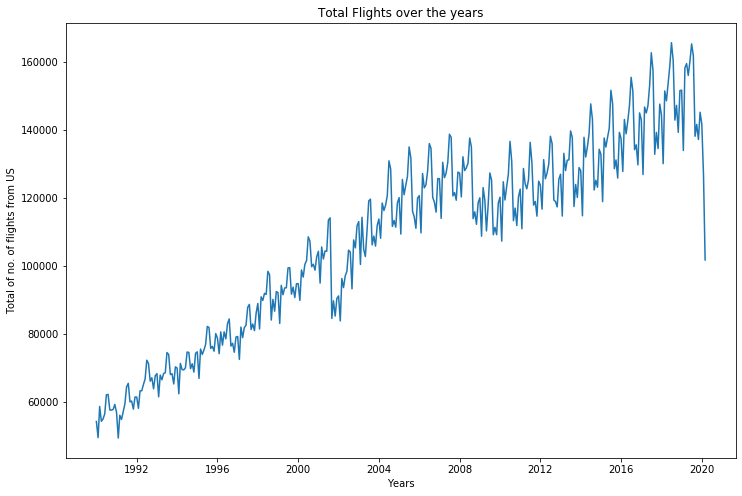

In [31]:
plt.figure(figsize=(12, 8))
fig = sns.lineplot(x=grouped_df['Date'], y = grouped_df['Total'])

# fig.title('safda')
fig = fig.set(xlabel='Years', ylabel='Total of no. of flights from US', title='Total Flights over the years')


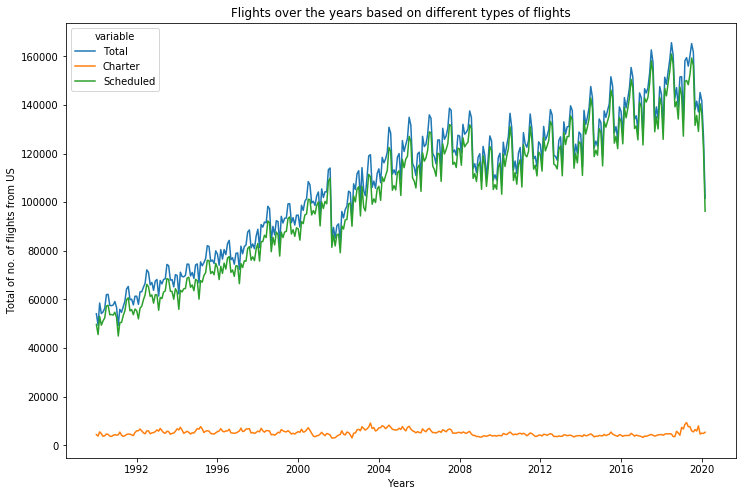

               Total      Scheduled      Charter
count     363.000000     363.000000   363.000000
mean   107719.011019  102576.531680  5142.479339
std     28361.417789   28467.779514  1176.059697
min     49264.000000   44968.000000  3007.000000
25%     82633.000000   76593.000000  4184.000000
50%    113395.000000  108506.000000  4978.000000
75%    128677.000000  124008.000000  5905.500000
max    165616.000000  160926.000000  9382.000000


'\nMost of the flights are scheduled flights with average 1.02 Lakh flights per month. \nCharter flights with average 5.1 Thousand flights per month.\n'

In [32]:
plt.figure(figsize=(12, 8))
# Using pd.melt to dissolve Total, Charter and Schedule into 1 columns and using Date as an identifier.
fig = sns.lineplot(x=pd.melt(grouped_df[['Date', 'Total', 'Charter', 'Scheduled']], id_vars=['Date'])['Date'],
                  y = pd.melt(grouped_df[['Date', 'Total', 'Charter', 'Scheduled']], id_vars=['Date'])['value'],
                  hue= pd.melt(grouped_df[['Date', 'Total', 'Charter', 'Scheduled']], id_vars=['Date'])['variable'])

# fig.title('safda')
fig = fig.set(xlabel='Years', ylabel='Total of no. of flights from US', title='Flights over the years based on different types of flights')
plt.show()
print(grouped_df[['Total', 'Scheduled', 'Charter']].describe())

'''
Most of the flights are scheduled flights with average 1.02 Lakh flights per month. 
Charter flights with average 5.1 Thousand flights per month.
'''

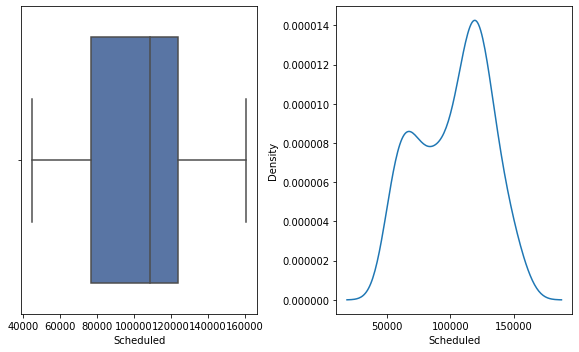

-0.20699470527350444
count       363.000000
mean     102576.531680
std       28467.779514
min       44968.000000
25%       76593.000000
50%      108506.000000
75%      124008.000000
max      160926.000000
Name: Scheduled, dtype: float64


In [33]:
# Mean Charter flights departures in all of US on monthly basis.

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
fig = sns.boxplot(x = grouped_df['Scheduled'], palette='deep')
plt.subplot(1, 2, 2)
fig = sns.kdeplot(x=grouped_df['Scheduled'])
plt.tight_layout()
plt.show()

print(grouped_df['Scheduled'].skew())
print(grouped_df['Scheduled'].describe())

# The number of flights departure in all of US ranges from 25 to 50. Not skewed.

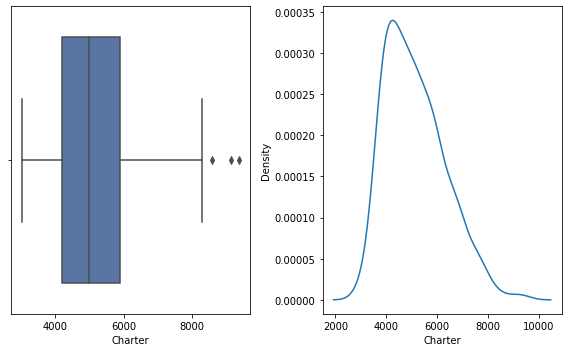

0.7196531668838613
count     363.000000
mean     5142.479339
std      1176.059697
min      3007.000000
25%      4184.000000
50%      4978.000000
75%      5905.500000
max      9382.000000
Name: Charter, dtype: float64


In [34]:
# Mean Charter flights departures in all of US on monthly basis.

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
fig = sns.boxplot(x = grouped_df['Charter'], palette='deep')
plt.subplot(1, 2, 2)
fig = sns.kdeplot(x=grouped_df['Charter'])
plt.tight_layout()
plt.show()

print(grouped_df['Charter'].skew())
print(grouped_df['Charter'].describe())

# The number of flights departure in all of US ranges from 1 to 4 on a monthly basis. A bit skewed.

**Total flights relation with Carrier group**

In [35]:
# Total flights from the original df based on carriergroup and then concatenating it with the grouped_df.
grouped_df['Total_carriergroup_1'] = perm_df.loc[perm_df['carriergroup']==1][['Year', 'Month', 'Total']].groupby(['Year', 'Month']).sum()['Total'].values
grouped_df['Total_carriergroup_0'] = perm_df.loc[perm_df['carriergroup']==0][['Year', 'Month', 'Total']].groupby(['Year', 'Month']).sum()['Total'].values

grouped_df = grouped_df.drop(['usg_wac', 'fg_wac', 'carriergroup'], axis=1)
grouped_df.head()

,Year,Month,Scheduled,Charter,Total,Date,Total_carriergroup_1,Total_carriergroup_0
0,1990,1,49721,4408,54129,1990-01-01,29229,24900
1,1990,2,45577,3814,49391,1990-02-01,26460,22931
2,1990,3,52993,5549,58542,1990-03-01,29998,28544
3,1990,4,49422,4773,54195,1990-04-01,28780,25415
4,1990,5,51151,3712,54863,1990-05-01,29981,24882


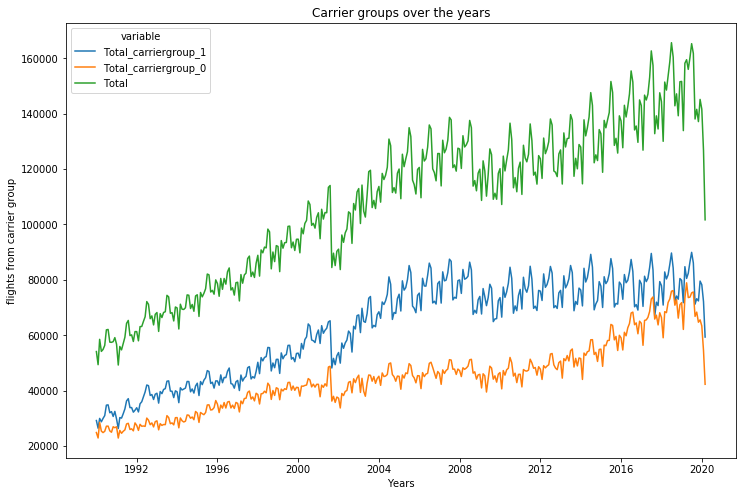

               Total  Total_carriergroup_1  Total_carriergroup_0
count     363.000000            363.000000            363.000000
mean   107719.011019          62929.471074          44789.539945
std     28361.417789          17093.206487          12315.233888
min     49264.000000          26347.000000          22917.000000
25%     82633.000000          46576.000000          36297.500000
50%    113395.000000          68765.000000          44560.000000
75%    128677.000000          77844.500000          50122.000000
max    165616.000000          89939.000000          78946.000000


'\nCarrier group 1 is domestic carriers and 0 is the foreign carriers\nForeign carriers has been seen rise since around 2012 whereas the flights from domestic carriers have been stagnant since \naround 2010. Foreign Carriers on average have 44.7 flights per month. Domestic carriers on avg have 62.9 flights per month. \n'

In [36]:
plt.figure(figsize=(12, 8))

# Using pd.melt to dissolve Total_carriergroup_1 and Total_carriergroup_0 into 1 columns and using Date and Total as identifier.
fig = sns.lineplot(x=pd.melt(grouped_df[['Date', 'Total_carriergroup_1', 'Total_carriergroup_0', 'Total']], id_vars=['Date'])['Date'],
                  y = pd.melt(grouped_df[['Date', 'Total_carriergroup_1', 'Total_carriergroup_0', 'Total']], id_vars=['Date'])['value'],
                  hue= pd.melt(grouped_df[['Date', 'Total_carriergroup_1', 'Total_carriergroup_0', 'Total']], id_vars=['Date'])['variable'])

fig = fig.set(xlabel='Years', ylabel='flights from carrier group', title='Carrier groups over the years')
plt.show()
print(grouped_df[['Total', 'Total_carriergroup_1', 'Total_carriergroup_0']].describe())

'''
Carrier group 1 is domestic carriers and 0 is the foreign carriers
Foreign carriers has been seen rise since around 2012 whereas the flights from domestic carriers have been stagnant since 
around 2010. Foreign Carriers on average have 44.7 flights per month. Domestic carriers on avg have 62.9 flights per month. 
'''

### Seasonality
From the above graphs we can see that there is a repetitive pattern in total number of flights. This is called seasonality.

Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day. For example the amount of sunscream protector (always low in winter and high in summer).

**Decomposition of Total from 1990 to 2020**

<Figure size 4000x1600 with 0 Axes>

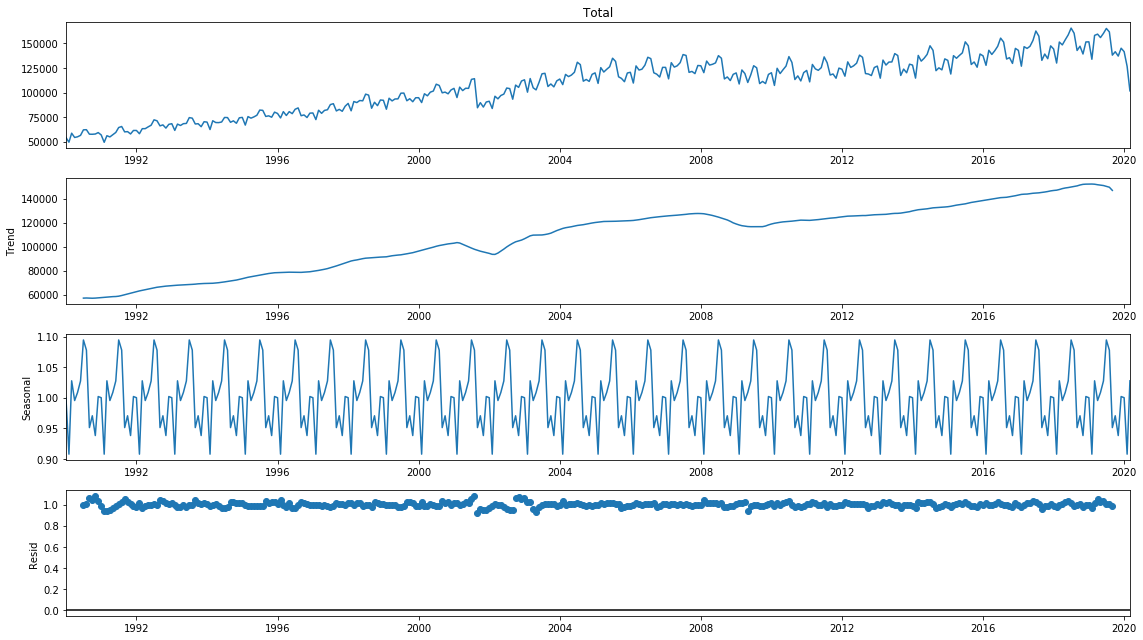

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result = seasonal_decompose(grouped_df.set_index('Date')['Total'], model='multiplicative')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# compare this predicted value with the observed one whatever difference you get is called Residual.

**Decomposition of Total from 2012-1 to 2013-12**

<Figure size 4000x1600 with 0 Axes>

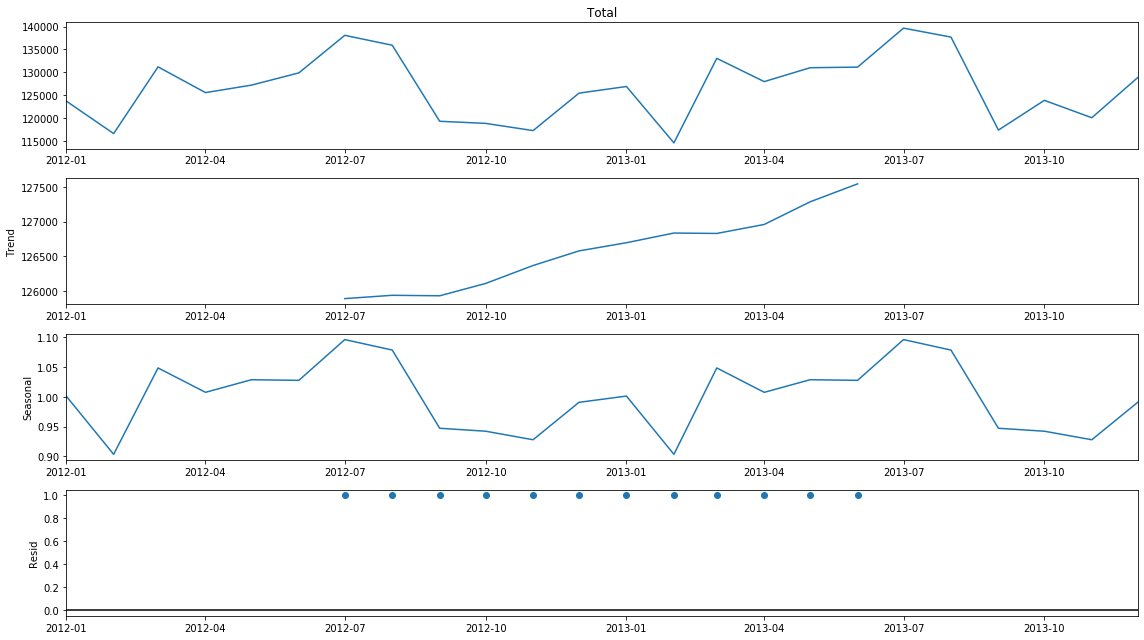

"\nIn February, September, October and November have Less number of fligths. Maybe because the school's first semester starts \nfrom late August/Early September and second semester starts from January till May\n"

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result = seasonal_decompose(grouped_df.loc[(grouped_df['Year']>=2012) & (grouped_df['Year']<2014)].set_index('Date')['Total'], model='multiplicative')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

'''
In February, September, October and November have Less number of fligths. Maybe because the school's first semester starts 
from late August/Early September and second semester starts from January till May
'''

<Figure size 4000x1600 with 0 Axes>

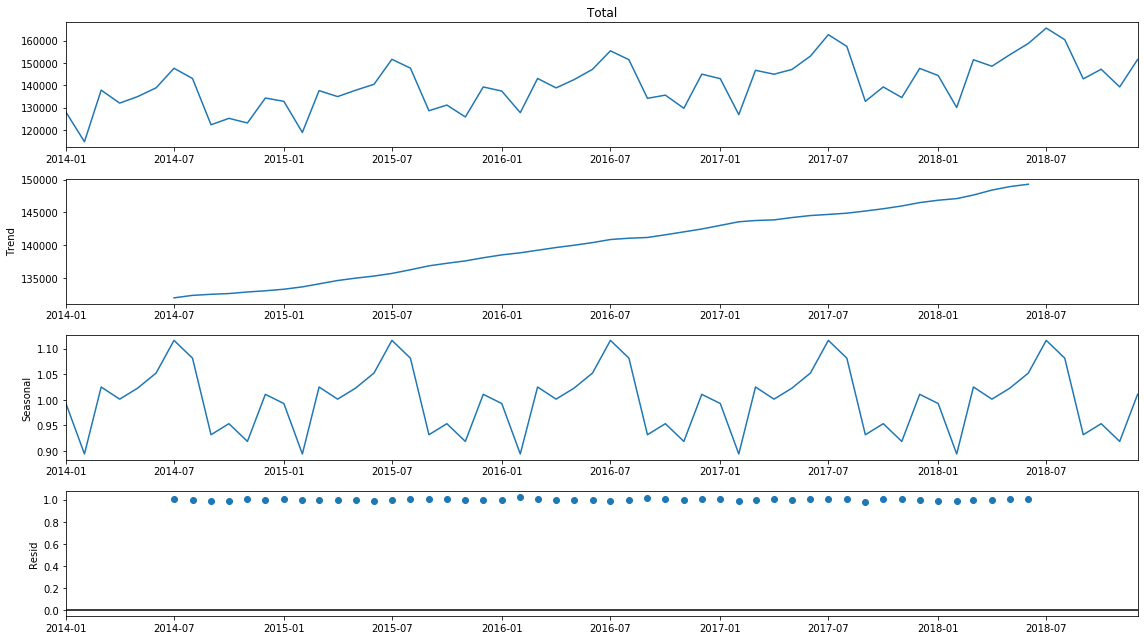

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result = seasonal_decompose(grouped_df.loc[(grouped_df['Year']>=2014) & (grouped_df['Year']<2019)].set_index('Date')['Total'], model='multiplicative')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# The two spikes are due to rise in total no. of flights in March and July. 

**White noise**:  It is a series of random numbers, and by definition, no algorithm can reasonably model its behavior. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

The following conditions must be satisfied for a time series to be classified as white noise:

- The average value (mean) is zero
- Standard deviation is constant — it doesn’t change over time
- The correlation between time series and its lagged version is not significant

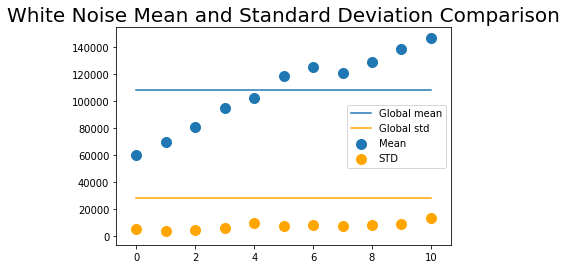

In [48]:
# Split into an arbitraty number of chunks
white_noise_chunks = np.split(grouped_df['Total'].values, 11)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [grouped_df['Total'].mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [grouped_df['Total'].std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

Here we can se the Mean for sample changes but standard deviation is constant. 

Plot autocorrelation function: Autocorrelation is the same, but with a twist — you’ll calculate a correlation between a sequence with itself lagged by some number of time units.

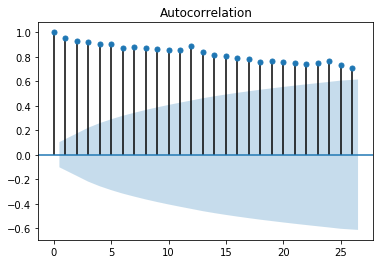

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(np.array(grouped_df['Total'].values));


We expect 95% of the spikes in the ACF to lie within 
    ±2/√T
        where  T: is the length of the time series.


Here, T=363 and so the bounds are at ±2/√363=±0.105. All of the autocorrelation coefficients lie within these limits, confirming that the data are white noise.Since the data has correlation greater than 0.105, which that means there is no white noise in the data.


If any 1 condition is false out of the three condition, then it means there is no white noise. Here 2 condition is not true(Autocorrelation and Mean) so we can say that the **data does not have white noise.**

**Random Walk**: A more challenging but equally unpredictable distribution in time series forecasting is a random walk. Unlike white noise, it has non-zero mean, non-constant std/variance, and when plotted, looks a lot like a regular distribution.

A random walk is not  a simple sequence of random numbers. In a random walk, each step is dependent on the previous step. For this reason, the Autocorrelation function of random walks does return non-zero correlations. The formula of a random walk is simple:
![](https://miro.medium.com/proxy/1*5m_X6KTNGar2K8oLd92XMg.png)

In [50]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(grouped_df['Total'].values)

print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")

'''
Here is the hypothesis relation for you:
Ho: the series is not stationary. In another words, your residue depends on itself (i.e.: yt depends on yt-1, yt-1 depends 
        on yt-2 ..., and so on)
Ha: the series is stationary (That is normally what we desire in regression analysis). Nothing more is needed to be done.
'''

ADF Statistic: -2.0296859160326806
p-value: 0.2737104217475259


0.27 > 0.05 SO Null Hypothesis is accepted or the series is not stationary.

Coverting non stationary data to stationary data(constant mean, variance, and covariance)

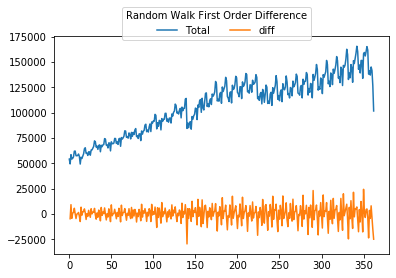

In [62]:
#acf -> remove trend 
data=pd.DataFrame()
data['Total'] = grouped_df['Total']
data["diff"] = data.diff().dropna()

ax = data.plot()
ax=ax.legend(ncol=5, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.0),
          bbox_transform=plt.gcf().transFigure,
          title='Random Walk First Order Difference')

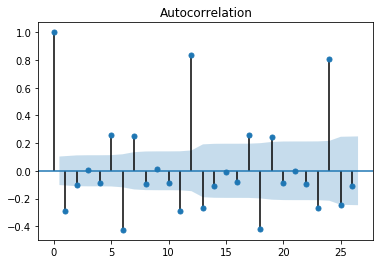

In [59]:
plot_acf(s_random_walk_diff);


In [71]:
from statsmodels.tsa.stattools import acf
print(acf(np.array(s_random_walk_diff), fft=False))

[ 1.         -0.28722086 -0.10406734  0.00700521 -0.08829649  0.26157568
 -0.42673323  0.25432438 -0.09511507  0.00966615 -0.09106137 -0.28971024
  0.83613581 -0.26543196 -0.10835544 -0.00915873 -0.07875756  0.26128138
 -0.41653821  0.24140808 -0.08580626 -0.00284363 -0.09827793 -0.27136752
  0.80383777 -0.24622554 -0.10829479 -0.00714906 -0.07663425  0.2480639
 -0.38528795  0.23244449 -0.08896016 -0.00349479 -0.08509885 -0.26274033
  0.76966294 -0.23629658 -0.10393167 -0.01646613 -0.06635455]


The first value is 1, because a correlation between two identical series was calculated. But take a look at as 12th period — autocorrelation value is 0.83. This tells you a value 12 periods ago has a strong impact on the value of the current month.

And there you have it — There are learnable patterns are found in the distribution once the series is stationary. In short, we can improve the model forecasting.

If the model residuals resemble white noise, you did a good thing. It’s unlikely you’ll be able to improve the model further. If there’s a pattern in the residuals, or mean/standard deviation isn’t constant, your work isn’t finished yet. That’s all we need to know.

**Conclusion for time series part**: There is no white noise and random walks present in the total no. of flights feature, thus we can use optimization techniques to predict the total flights other than moving average(MA) for eg., ARIMA, Prophet, etc. 